<a href="https://colab.research.google.com/github/charan12345678/Flipkart/blob/master/Final_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
!git clone https://github.com/charan12345678/Flipkart.git


fatal: destination path 'Flipkart' already exists and is not an empty directory.


In [197]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy 
import sklearn
import seaborn as sns 
import re


In [198]:
df = pd.read_csv("New_Flipkart.csv",)
df.drop(['product_name'],axis=1,inplace=True)
df.head()

,Ram,New_back_camera,battery,Internal_storage,display,rating,price
0,4.0,12,5000,64,6.22,4.4,9799
1,4.0,48,5000,128,6.50,4.5,11999
2,4.0,48,5000,128,6.50,4.5,11999
3,6.0,64,4500,128,6.53,4.5,16999
4,8.0,64,4300,128,6.50,4.4,17999


In [199]:
df.shape

(315, 7)

# **EXPLORATORY DATA ANALYSIS**




**Inference :-**
 **1)There are 315 rows and 7 columns in this dataset**






In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ram               315 non-null    float64
 1   New_back_camera   315 non-null    int64  
 2   battery           315 non-null    int64  
 3   Internal_storage  315 non-null    int64  
 4   display           315 non-null    float64
 5   rating            315 non-null    float64
 6   price             315 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 17.4 KB


**Inference :-** 
**1) There are 315 non null objects of type int and float in each column**

In [201]:
df.describe()

,Ram,New_back_camera,battery,Internal_storage,display,rating,price
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,14.474603,21.946032,3443.380952,87.092063,5.430032,4.207302,19321.806349
std,50.513330,21.927942,1209.793863,83.700450,1.595658,0.370459,18292.210867
min,1.000000,1.000000,1000.000000,1.000000,1.770000,2.100000,648.000000
25%,4.000000,12.000000,3000.000000,32.000000,5.475000,4.000000,9549.500000
50%,6.000000,13.000000,4000.000000,64.000000,6.200000,4.300000,14999.000000
75%,8.000000,36.500000,4230.000000,128.000000,6.400000,4.500000,22569.500000
max,512.000000,108.000000,6000.000000,512.000000,6.800000,5.000000,124999.000000



**Inference**

**1.   The above table shows the mean , standard deviation,minimum and maximum values ,first,second and third quartile values of each column of the dataset 'df',with Outliers**




In [202]:
df.loc[:,"Ram"].mean()

14.474603174603175

# **Univariate Analysis of each feature in the dataset**

**Univariate Analysis of RAM**

In [203]:
df['Ram'].describe()

count    315.000000
mean      14.474603
std       50.513330
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max      512.000000
Name: Ram, dtype: float64

**Inference :-** 

*  1) The mean value of the column 'Ram' is 14.47 GB ,standard deviation is 50.51 GB ,minimum value is 1 GB and maximum value is 512 MB 
*  2)The 25th percentile value is 4 GB,50th percentile is 6 GB,75th percentile is 8 GB ,the median value is 6 GB




In [204]:
ram_grp = df.groupby('Ram')
ram_grp.count()
#ram_grp.size()

,New_back_camera,battery,Internal_storage,display,rating,price
Ram,,,,,,
1.0,7,7,7,7,7,7
1.5,1,1,1,1,1,1
2.0,22,22,22,22,22,22
3.0,45,45,45,45,45,45
4.0,80,80,80,80,80,80
6.0,48,48,48,48,48,48
8.0,51,51,51,51,51,51
10.0,1,1,1,1,1,1
12.0,8,8,8,8,8,8


# Inference:-


1.   Most of the mobiles have Rams between 2 GB to 8 GB and there are very less mobiles with Rams between 10-24 GB and even lesser number of mobiles between  42 GB and 128 Gb, but mobiles with Ram 32 GB are also in majority and fall under the normal distribution

2.   Mobiles with Ram 512 MB and 128 GB seem like outliers drifting away from the normal distribution ,also there are just 3 mobiles with 128 GB and just 1 mobile with Ram 512 MB ,it seems safe to drop just 4 rows with outliers in Ram. 



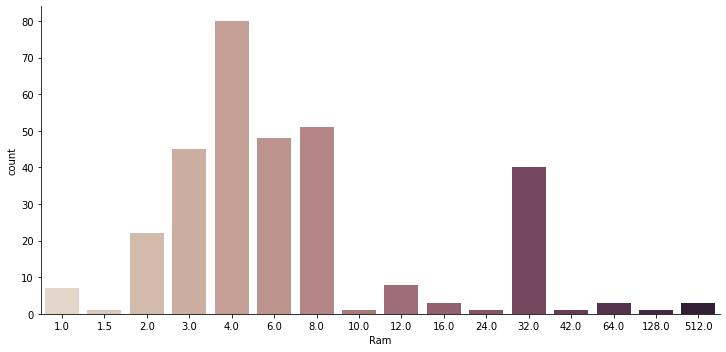

In [205]:
sns.catplot(x = "Ram", kind = "count", palette = "ch: 0.25", data = df,aspect=2)



**Inference :-**

*   The above graph is right skewed and the data distribution falls between 2 GB and 32 GB  and very few mobiles have Rams from 16 GB to 128 GB 
*   The graph clearly shows that most of the mobiles have a RAM of 4GB,almost around 80 mobiles among 315 mobiles have a RAM of 4 GB and very few mobiles have Rams of 1.5,10,16,24,64,42,128 GBs 



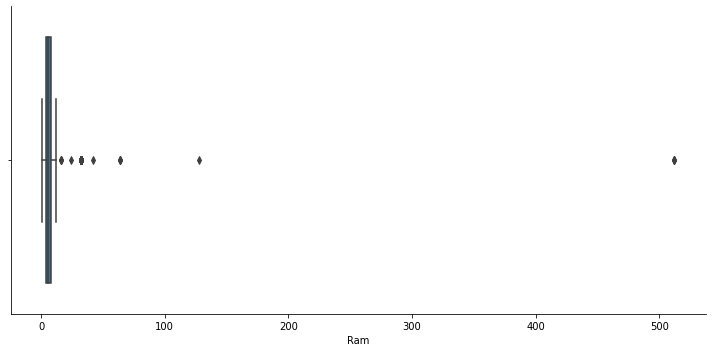

In [206]:
sns.catplot(x="Ram",data=df,kind='box',aspect=2)

**Inference :-**

1.   The Box plot suggests that all Rams more than say 12 GB are outliers
2.   The mobile with RAM 512 MB is clearly an extreme outlier



**Univariate Analysis of the feature Camera**

In [207]:
df['New_back_camera'].describe()

count    315.000000
mean      21.946032
std       21.927942
min        1.000000
25%       12.000000
50%       13.000000
75%       36.500000
max      108.000000
Name: New_back_camera, dtype: float64

**Inference :-**

1.   The mean value of the column 'New_back_camera' is 21.94 MP ,standard deviation is 21.92 MP ,minimum value is 1 MP and maximum value is 108 MP
2.   The 25th percentile value is 12 MP,50th percentile is 13 MP,75th percentile is 36.5 MP ,the median value is 13 MP






In [208]:
cam_grp = df.groupby('New_back_camera')
cam_grp.count()


,Ram,battery,Internal_storage,display,rating,price
New_back_camera,,,,,,
1,46,46,46,46,46,46
2,7,7,7,7,7,7
3,2,2,2,2,2,2
5,2,2,2,2,2,2
8,11,11,11,11,11,11
12,40,40,40,40,40,40
13,84,84,84,84,84,84
16,38,38,38,38,38,38
20,1,1,1,1,1,1


**Inference:-**

*   Most of the mobiles have Cameras with Mega pixels between 8 MP to 16 MP and there are very less mobiles with Camera between 2,3,5,20 and 108 MP 
*   Mobiles with cameras of 108 MP are outliers and mobiles with 1 MP camera although in majority, are outliers



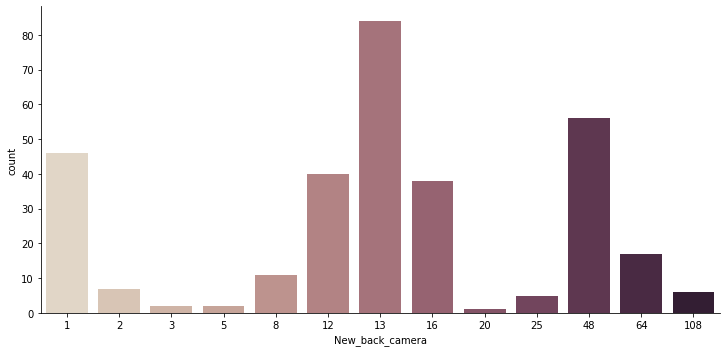

In [209]:
sns.catplot(x = "New_back_camera", kind = "count", palette = "ch: 0.25", data = df,aspect=2)



**Inference :-**

1.   The above graph suggests that the major data distribution is between 8 MP to 64 MP ,which means most of the mobiles have camera with mega pixel between 8 MP to 64 MP
2.   Mobiles with camera 1 MP and 108 MP are outliers as per the above graph



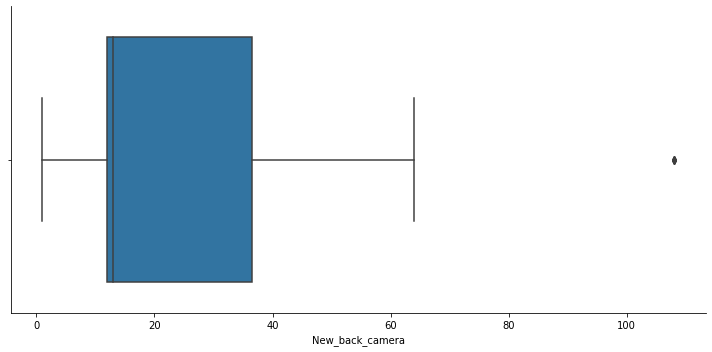

In [210]:
sns.catplot(x="New_back_camera",data=df,kind='box',aspect=2)

**Inference :-**

1.   The above Box plot clearly says that mobiles with camera 108 MP is an outlier and the upper quartile is around 64 MP and lower quartile is around 1 MP




**Univariate Analysis of the feature Battery**

In [211]:
df['battery'].describe()

count     315.000000
mean     3443.380952
std      1209.793863
min      1000.000000
25%      3000.000000
50%      4000.000000
75%      4230.000000
max      6000.000000
Name: battery, dtype: float64

Inference :-

1.   The mean value of the column 'Battery' is 3443.38 mAh ,standard deviation is 1209.79 mAh ,the mobile with the least battery has 1000 mAh and the one with highest battery has 6000 mAh 
2.   The 25th percentile value is 3000 mAh,50th percentile is 4000 mAh,75th percentile is 4230 mAh ,the median value is 4000 mAh



In [212]:
bat_grp = df.groupby('battery')
bat_grp.count()

,Ram,New_back_camera,Internal_storage,display,rating,price
battery,,,,,,
1000,14,14,14,14,14,14
1050,20,20,20,20,20,20
1100,1,1,1,1,1,1
1200,5,5,5,5,5,5
1400,1,1,1,1,1,1
1450,2,2,2,2,2,2
1500,2,2,2,2,2,2
1750,3,3,3,3,3,3
1800,2,2,2,2,2,2


In [213]:
bat = pd.cut(df['battery'], bins=10)
bat.value_counts()

(3500.0, 4000.0]    80
(4000.0, 4500.0]    56
(995.0, 1500.0]     45
(4500.0, 5000.0]    38
(3000.0, 3500.0]    38
(2500.0, 3000.0]    38
(2000.0, 2500.0]    10
(1500.0, 2000.0]     7
(5500.0, 6000.0]     2
(5000.0, 5500.0]     1
Name: battery, dtype: int64

([<matplotlib.patches.Wedge at 0x7f54742e7080>,
 [Text(1.1520906954246775, 1.1811803543557113, '(3500.0, 4000.0)'),
  Text(-0.9089801649008037, 1.3770457725932381, '(4000.0, 4500.0)'),
  Text(-1.6496717654886262, -0.03290997036825478, '(995.0, 1500.0)'),
  Text(-1.0917814339299112, -1.237139159725351, '(4500.0, 5000.0)'),
  Text(0.05758443631080847, -1.6489948552663125, '(3000.0, 3500.0]'),
  Text(1.1754207491825737, -1.1579663476936959, '(2500.0, 3000.0]'),
  Text(1.5766952122148221, -0.48634576977584315, '(2000.0, 2500.0]'),
  Text(1.6361512795757134, -0.21332836272459385, '(1500.0, 2000.0] '),
  Text(1.6486872226782372, -0.06580609225232287, '(5500.0, 6000.0]'),
  Text(1.6499179434360438, -0.016455392057798533, '(5000.0, 5500.0]')],
 [Text(0.6284131065952785, 0.6442801932849332, '25%'),
  Text(-0.4958073626731656, 0.751115875959948, '18%'),
  Text(-0.899820962993796, -0.017950892928138965, '14%'),
  Text(-0.5955171457799514, -0.6748031780320095, '12%'),
  Text(0.031409692533168256, 

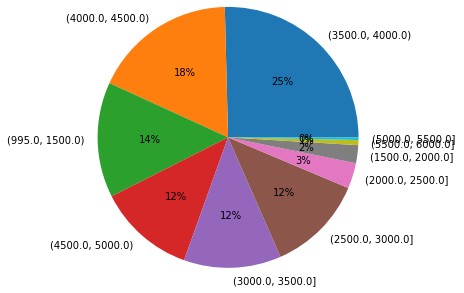

In [214]:
bat1 = ["(3500.0, 4000.0)","(4000.0, 4500.0)","(995.0, 1500.0)","(4500.0, 5000.0)","(3000.0, 3500.0]","(2500.0, 3000.0]","(2000.0, 2500.0]","(1500.0, 2000.0] ","(5500.0, 6000.0]","(5000.0, 5500.0]"]
bat2 = [80,56,45,38,38,38,10,7,2,1]
plt.pie(bat2, labels= bat1, autopct= '%0.0f%%',radius= 1.5)

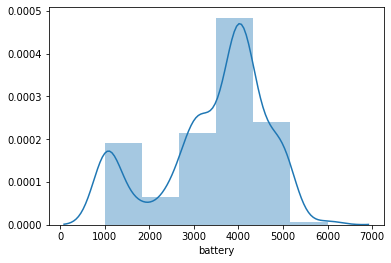

In [215]:
sns.distplot(df.battery,bins=6)

**Inference :-**

1.   The above distribution plot shows that the major data distribution is between 3000 mAh and 5000 mAh and most of the mobiles have a battery of around 4000 mAh
2.   Very few mobiles have a battery more than 5500 mAh and could be outliers in the data set



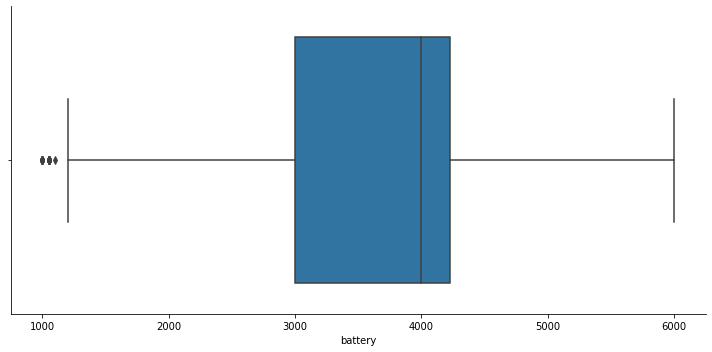

In [216]:
sns.catplot(x="battery",data=df,kind='box',aspect=2)

**Inference :-**

1.   The box plot clearly shows that the batteries around 1000 mAh are outliers



In [217]:
df['Internal_storage'].describe()

count    315.000000
mean      87.092063
std       83.700450
min        1.000000
25%       32.000000
50%       64.000000
75%      128.000000
max      512.000000
Name: Internal_storage, dtype: float64

**Inference :-**
1.   The mean value of the column 'Internal storage' is 87 GB ,standard deviation is 83.7 GB ,minimum value is 1 GB and maximum value is 512 GB 
2.   The 25th percentile value is 32 GB,50th percentile is 64 GB,75th percentile is 128 GB ,the median value is 64 GB



In [218]:
store_grp = df.groupby('Internal_storage')
store_grp.count()

,Ram,New_back_camera,battery,display,rating,price
Internal_storage,,,,,,
1,1,1,1,1,1,1
4,2,2,2,2,2,2
8,4,4,4,4,4,4
15,1,1,1,1,1,1
16,19,19,19,19,19,19
24,1,1,1,1,1,1
32,94,94,94,94,94,94
42,1,1,1,1,1,1
64,87,87,87,87,87,87


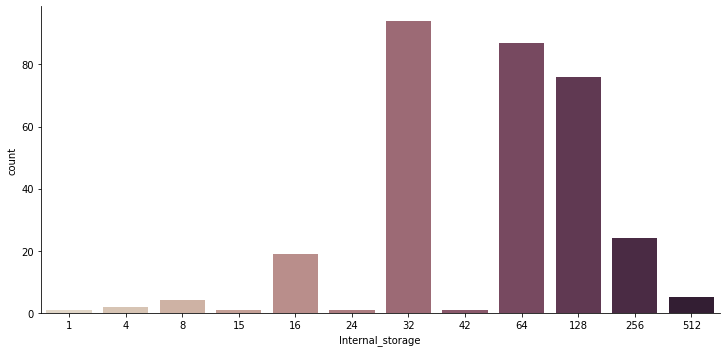

In [219]:
sns.catplot(x = "Internal_storage", kind = "count", palette = "ch: 0.25", data = df,aspect=2)



**Inference :-**

1.   The above graph says that most of the mobiles have an Internal storage of 32 GB and the major data distribution is between 32 GB to 256 GB
2.   Very Few mobiles have Internal storage between 1 GB to 15 GB these mobiles seem like outliers along with 512 GB Internal storage



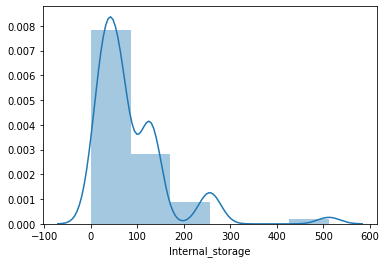

In [220]:
sns.distplot(df.Internal_storage,bins=6)

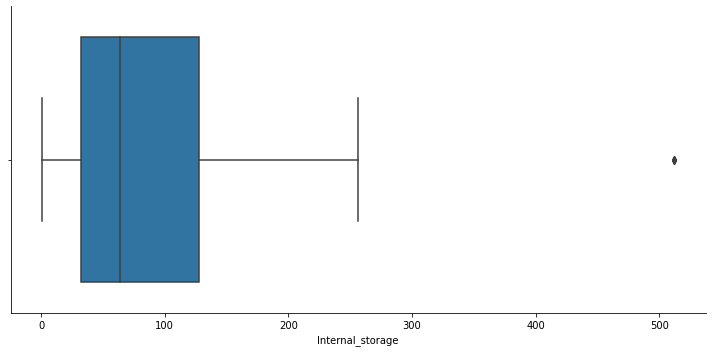

In [221]:
sns.catplot(x="Internal_storage",data=df,kind='box',aspect=2)

**Inference :-**

1.   The box plot clearly says that the mobiles with 512 GB of Internal storage are outliers



In [222]:
df['display'].describe()

count    315.000000
mean       5.430032
std        1.595658
min        1.770000
25%        5.475000
50%        6.200000
75%        6.400000
max        6.800000
Name: display, dtype: float64

**Inference :-**

1.   The mean value of the column 'display' is 5.43 inches  ,standard deviation is 1.59 inches ,minimum value is 1.77 inches and maximum value is 6.8 inches 
2.   The lower quartile is 5.475 inches,the upper quartile is 6.4 inches and the median is 6.2 inches 



In [223]:
disp_grp = df.groupby('display')
disp_grp.count()

,Ram,New_back_camera,battery,Internal_storage,rating,price
display,,,,,,
1.77,3,3,3,3,3,3
1.80,27,27,27,27,27,27
2.10,1,1,1,1,1,1
2.30,1,1,1,1,1,1
2.40,19,19,19,19,19,19
2.44,1,1,1,1,1,1
2.80,1,1,1,1,1,1
4.00,4,4,4,4,4,4
4.70,1,1,1,1,1,1


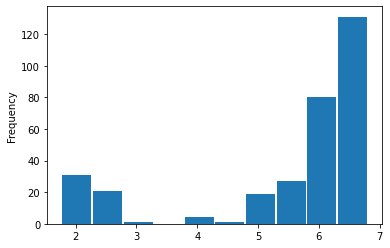

In [224]:
df.display.plot(kind= 'hist',bins = 10,rwidth = 0.95)

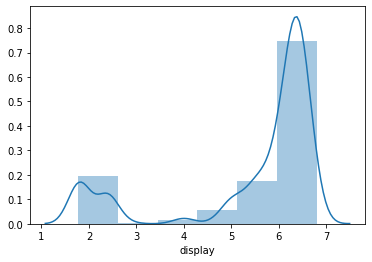

In [225]:
sns.distplot(df.display,bins=6)

**Inference :-**

1.   The above graph is left skewed indicating that the major data distribution is between 5 to 7 inches,which means most of the mobiles have display size around 5 to 7 inches
2.   Mobiles with display size of 2 inches seem like an outlier from the above graph



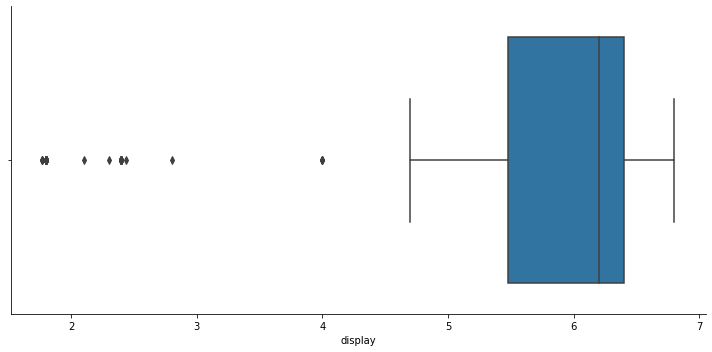

In [226]:
sns.catplot(x="display",data=df,kind='box',aspect=2)

**Inference :-**

1.   The Box plot says that the mobiles with display size between 1.5 to 4.2 inches are outliers from the normal distribution.

2.   The lower quartile is near 5 inches and upper quartile is 7 inches and the major distribution of data is between this 5 to 7 inches range ,which implies that most of the mobiles have a display size of 5 to 7 inches




In [227]:
df['rating'].describe()

count    315.000000
mean       4.207302
std        0.370459
min        2.100000
25%        4.000000
50%        4.300000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

**Inference :-**

1.    The mean value of the column 'rating' is 4.2 ,standard deviation is 0.37 ,minimum value is 2.1 and maximum value is 5  
2.   The 25th percentile value is 4,50th percentile is 4.3,75th percentile is 4.5 ,the median value is 4.3



In [228]:
rat_grp = df.groupby('rating')
rat_grp.count()

,Ram,New_back_camera,battery,Internal_storage,display,price
rating,,,,,,
2.1,1,1,1,1,1,1
2.9,1,1,1,1,1,1
3.1,1,1,1,1,1,1
3.3,4,4,4,4,4,4
3.4,3,3,3,3,3,3
3.5,11,11,11,11,11,11
3.6,18,18,18,18,18,18
3.7,7,7,7,7,7,7
3.8,6,6,6,6,6,6


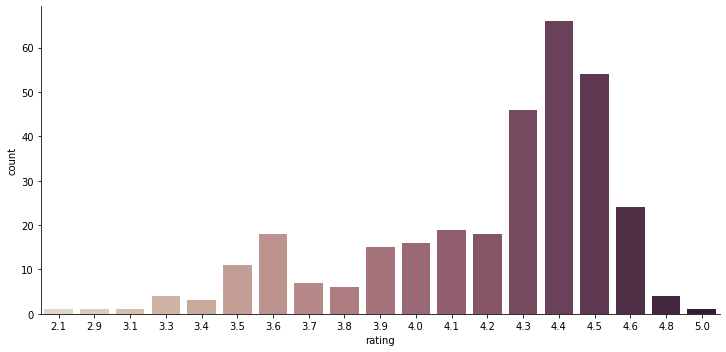

In [229]:
sns.catplot(x = "rating", kind = "count", palette = "ch: 0.25", data = df,aspect=2)



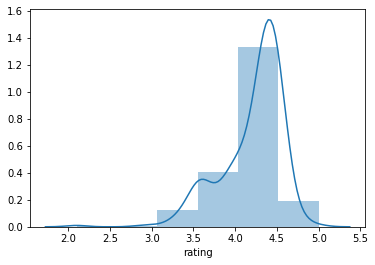

In [230]:
sns.distplot(df.rating,bins=6)

**Inference :-**

1.   The above graph is bell curved with a slight left skew and the mojority distribution is between the range 3.7 to 4.8
2.   Most of the mobiles have a rating between 4.2 to 4.5



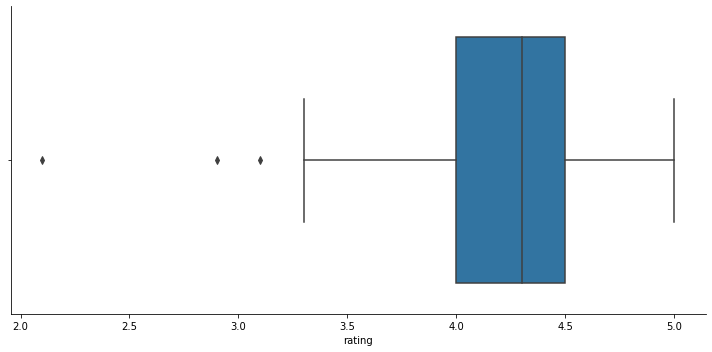

In [231]:
sns.catplot(x="rating",data=df,kind='box',aspect=2)

**Inference :-**

1.   The Box plot says the outliers are between 2.2 to 3.4
2.   The Upper quartile bound is 5 and the lower quartile bound is 3.5



In [232]:
df['price'].describe()

count       315.000000
mean      19321.806349
std       18292.210867
min         648.000000
25%        9549.500000
50%       14999.000000
75%       22569.500000
max      124999.000000
Name: price, dtype: float64

**Inference :-**

1.   The mean value of the column 'price' is 19321.8 ,standard deviation is 18292.21,minimum value is 648 and maximum value is 124999 
2.   The 25th percentile value is 9549.5,50th percentile is 22569.5, the median value is 14999 Rs.



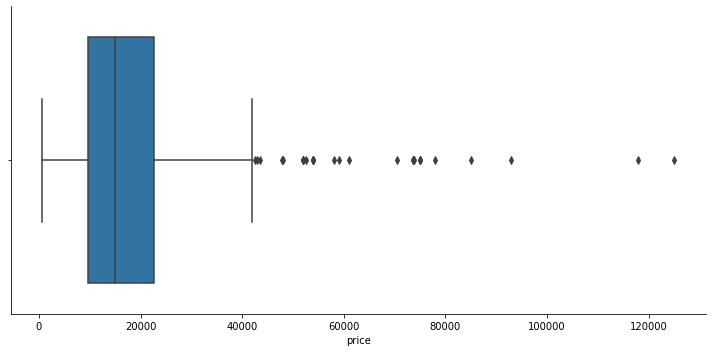

In [233]:
 sns.catplot(x="price",data=df,kind='box',aspect=2)

**Inference :-**

1.   The Box plot shows that the mobiles with prices more than 40000 are outliers
2.   The lower quartile bound is 0 and the upper quartile bound is 40000



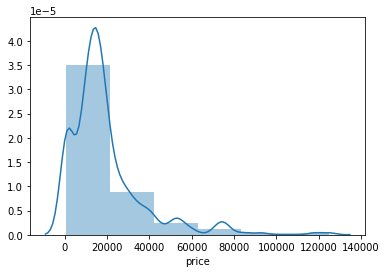

In [234]:
sns.distplot(df.price,bins=6)

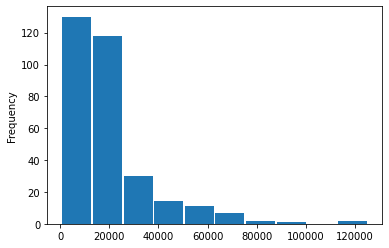

In [235]:
df.price.plot(kind= 'hist',bins = 10,rwidth = 0.95)


**Inference:-**
1.   The above 2 graphs ,ditribution plot and histogram shows that the graph is right skewed and the majority of the data distribution is 1000 to 25000
2.   The mobiles with prices above 60000 are rare and far from the normal distribution and can be treated as outliers 



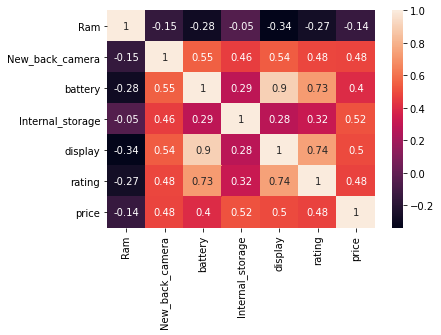

In [236]:
corelation = df.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)


**Inference**:-

1.   The correlation matrix above clearly shows that the features 'Battery' and 'Display' are very strongly corelated with a correlation score of 0.9 ,so they both carry the same information to the dataset and they might harm the model , and one of them can be dropped 
2.   The features 'rating' and 'battery' are also corelated but not so strogly corelated with a corelation score of 0.73 
3. The features 'rating' and 'display' are also corelated but not so strogly corelated with a corelation score of 0.73



In [237]:
corr = df.corr() #plot with actual values
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Ram,New_back_camera,battery,Internal_storage,display,rating,price
Ram,1.00,-0.15,-0.28,-0.05,-0.34,-0.27,-0.14
New_back_camera,-0.15,1.00,0.55,0.46,0.54,0.48,0.48
battery,-0.28,0.55,1.00,0.29,0.90,0.73,0.40
Internal_storage,-0.05,0.46,0.29,1.00,0.28,0.32,0.52
display,-0.34,0.54,0.90,0.28,1.00,0.74,0.50
rating,-0.27,0.48,0.73,0.32,0.74,1.00,0.48
price,-0.14,0.48,0.40,0.52,0.50,0.48,1.00


In [238]:
price_corr = df.corr()['price']
price_corr

Ram                -0.144331
New_back_camera     0.476944
battery             0.399584
Internal_storage    0.516987
display             0.497244
rating              0.475312
price               1.000000
Name: price, dtype: float64

**Inference :-**

1.   The above 'Price correlation' table shows the extent of impact every feature has on the dependent variable 'Price'.
2.   The features 'Internal storage' and 'display' has the highest effect on 'Price' with Corelation scores of 0.51 and 0.49 each



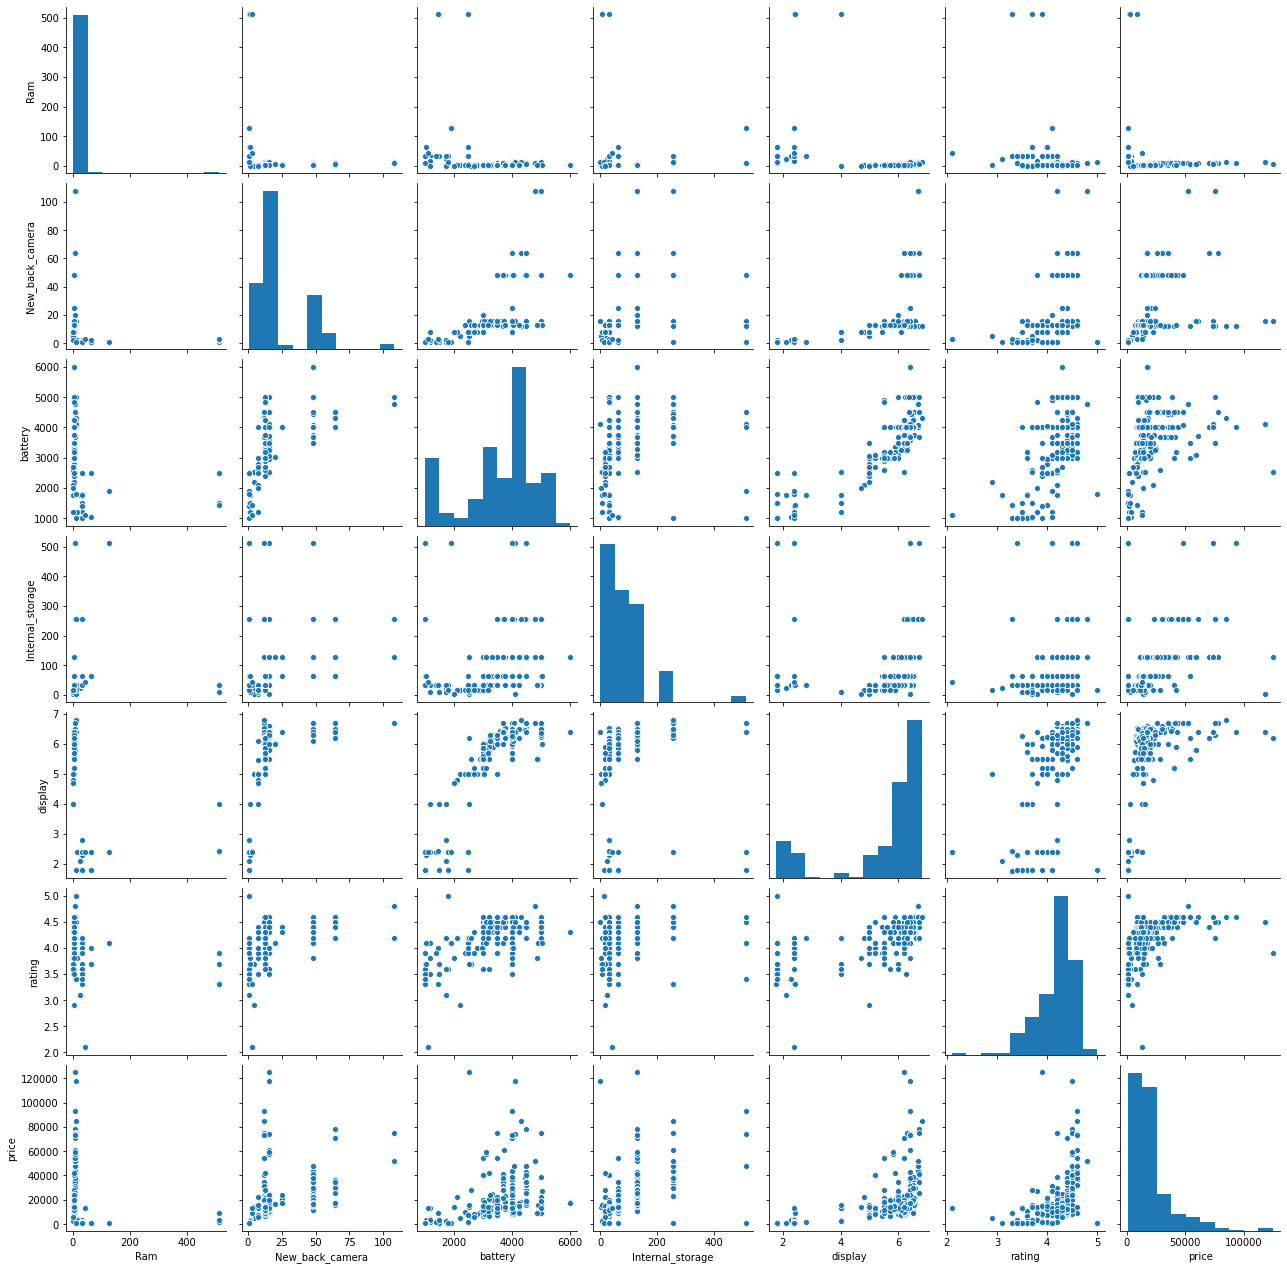

In [239]:
sns.pairplot(df)

**Inference :-**

*   The pairplot shows that there's a linear relation between features with higher corelation scores and no linear relation between features with medium and lesser corelation scores
*   The features battery and display have a linear relation 



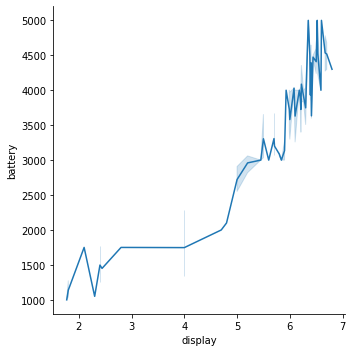

In [240]:
sns.relplot('display','battery',data=df,kind='line')

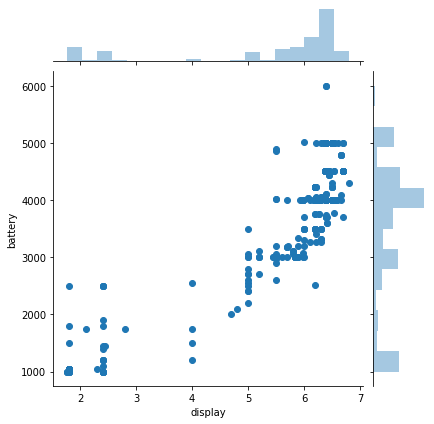

In [241]:
sns.jointplot('display','battery',df)

**Inference:-**

1.   Since the corelation score between the features 'battery' and 'display' is 0.9 ,they give a linear distribution curve in the jointplot and relative plots, as we can clearly see how the battery is increasing with increase in the value of display.

2. Since both these features have the same effect on the dataset v ,one of them can be dropped




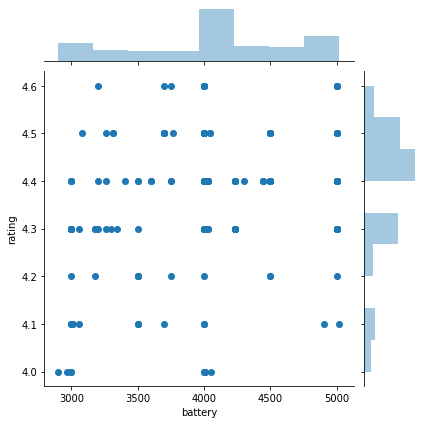

In [271]:
sns.jointplot('battery','rating',df)

**Inference :-**

1.   Since the corelation between battery and rating is 0.73 and not so strongly corelated the Jointplot doesn't show a linear relationship between these features



In [242]:
df

,Ram,New_back_camera,battery,Internal_storage,display,rating,price
0,4.0,12,5000,64,6.22,4.4,9799
1,4.0,48,5000,128,6.50,4.5,11999
2,4.0,48,5000,128,6.50,4.5,11999
3,6.0,64,4500,128,6.53,4.5,16999
4,8.0,64,4300,128,6.50,4.4,17999
...,...,...,...,...,...,...,...
310,4.0,16,3500,64,6.00,4.4,19500
311,1.0,8,2700,16,5.00,4.3,5449
312,4.0,13,3180,64,5.70,4.3,13990
313,42.0,3,1100,42,2.40,2.1,12999


# **REMOVING OUTLIERS FROM EACH FEATURE**

In [243]:
Q1 = np.quantile(df['Ram'],0.25)
Q3 = np.quantile(df['Ram'],0.75)
IQR = Q3-Q1
LB = Q1-(1.5*IQR)
UB = Q3+(1.5*IQR)
print(LB,UB,IQR)
#df.drop(df[ (df.Ram > UB) | (df.Ram < LB) ].index , inplace=True)

-2.0 14.0 4.0


In [244]:
df.drop(df[ (df.Ram > UB) | (df.Ram < LB) ].index , inplace=True)
df

,Ram,New_back_camera,battery,Internal_storage,display,rating,price
0,4.0,12,5000,64,6.22,4.4,9799
1,4.0,48,5000,128,6.50,4.5,11999
2,4.0,48,5000,128,6.50,4.5,11999
3,6.0,64,4500,128,6.53,4.5,16999
4,8.0,64,4300,128,6.50,4.4,17999
...,...,...,...,...,...,...,...
309,4.0,16,3260,64,6.30,4.5,24000
310,4.0,16,3500,64,6.00,4.4,19500
311,1.0,8,2700,16,5.00,4.3,5449
312,4.0,13,3180,64,5.70,4.3,13990


In [245]:
Q1 = np.quantile(df['New_back_camera'],0.25)
Q3 = np.quantile(df['New_back_camera'],0.75)
IQR = Q3-Q1
LB = Q1-(1.5*IQR)
UB = Q3+(1.5*IQR)
print(LB,UB,IQR)
#df.drop(df[ (df.New_back_camera > UB) | (df.New_back_camera < LB) ].index , inplace=True)

-39.5 100.5 35.0


In [246]:
df.drop(df[ (df.New_back_camera > UB) | (df.New_back_camera < LB) ].index , inplace=True)
df

,Ram,New_back_camera,battery,Internal_storage,display,rating,price
0,4.0,12,5000,64,6.22,4.4,9799
1,4.0,48,5000,128,6.50,4.5,11999
2,4.0,48,5000,128,6.50,4.5,11999
3,6.0,64,4500,128,6.53,4.5,16999
4,8.0,64,4300,128,6.50,4.4,17999
...,...,...,...,...,...,...,...
309,4.0,16,3260,64,6.30,4.5,24000
310,4.0,16,3500,64,6.00,4.4,19500
311,1.0,8,2700,16,5.00,4.3,5449
312,4.0,13,3180,64,5.70,4.3,13990


In [247]:
Q1 = np.quantile(df['battery'],0.25)
Q3 = np.quantile(df['battery'],0.75)
IQR = Q3-Q1
LB = Q1-(1.5*IQR)
UB = Q3+(1.5*IQR)
print(LB,UB,IQR)


1805.0 5685.0 970.0


In [248]:
df.drop(df[ (df.battery > UB) | (df.battery < LB) ].index , inplace=True)
df

,Ram,New_back_camera,battery,Internal_storage,display,rating,price
0,4.0,12,5000,64,6.22,4.4,9799
1,4.0,48,5000,128,6.50,4.5,11999
2,4.0,48,5000,128,6.50,4.5,11999
3,6.0,64,4500,128,6.53,4.5,16999
4,8.0,64,4300,128,6.50,4.4,17999
...,...,...,...,...,...,...,...
309,4.0,16,3260,64,6.30,4.5,24000
310,4.0,16,3500,64,6.00,4.4,19500
311,1.0,8,2700,16,5.00,4.3,5449
312,4.0,13,3180,64,5.70,4.3,13990


In [249]:
Q1 = np.quantile(df['Internal_storage'],0.25)
Q3 = np.quantile(df['Internal_storage'],0.75)
IQR = Q3-Q1
LB = Q1-(1.5*IQR)
UB = Q3+(1.5*IQR)
print(LB,UB,IQR)


-112.0 272.0 96.0


In [250]:
df.drop(df[ (df.Internal_storage > UB) | (df.Internal_storage < LB) ].index , inplace=True)
df

,Ram,New_back_camera,battery,Internal_storage,display,rating,price
0,4.0,12,5000,64,6.22,4.4,9799
1,4.0,48,5000,128,6.50,4.5,11999
2,4.0,48,5000,128,6.50,4.5,11999
3,6.0,64,4500,128,6.53,4.5,16999
4,8.0,64,4300,128,6.50,4.4,17999
...,...,...,...,...,...,...,...
309,4.0,16,3260,64,6.30,4.5,24000
310,4.0,16,3500,64,6.00,4.4,19500
311,1.0,8,2700,16,5.00,4.3,5449
312,4.0,13,3180,64,5.70,4.3,13990


In [251]:
Q1 = np.quantile(df['display'],0.25)
Q3 = np.quantile(df['display'],0.75)
IQR = Q3-Q1
LB = Q1-(1.5*IQR)
UB = Q3+(1.5*IQR)
print(LB,UB,IQR)

5.333749999999998 7.043750000000003 0.4275000000000011


In [252]:

df.drop(df[ (df.display > UB) | (df.display < LB) ].index , inplace=True)
df

,Ram,New_back_camera,battery,Internal_storage,display,rating,price
0,4.0,12,5000,64,6.22,4.4,9799
1,4.0,48,5000,128,6.50,4.5,11999
2,4.0,48,5000,128,6.50,4.5,11999
3,6.0,64,4500,128,6.53,4.5,16999
4,8.0,64,4300,128,6.50,4.4,17999
...,...,...,...,...,...,...,...
308,4.0,13,3000,64,5.84,4.3,14500
309,4.0,16,3260,64,6.30,4.5,24000
310,4.0,16,3500,64,6.00,4.4,19500
312,4.0,13,3180,64,5.70,4.3,13990


In [253]:
Q1 = np.quantile(df['rating'],0.25)
Q3 = np.quantile(df['rating'],0.75)
IQR = Q3-Q1
LB = Q1-(1.5*IQR)
UB = Q3+(1.5*IQR)
print(LB,UB,IQR)

3.9999999999999996 4.800000000000001 0.20000000000000018


In [254]:
df.drop(df[ (df.rating > UB) | (df.rating < LB) ].index , inplace=True)
df

,Ram,New_back_camera,battery,Internal_storage,display,rating,price
0,4.0,12,5000,64,6.22,4.4,9799
1,4.0,48,5000,128,6.50,4.5,11999
2,4.0,48,5000,128,6.50,4.5,11999
3,6.0,64,4500,128,6.53,4.5,16999
4,8.0,64,4300,128,6.50,4.4,17999
...,...,...,...,...,...,...,...
308,4.0,13,3000,64,5.84,4.3,14500
309,4.0,16,3260,64,6.30,4.5,24000
310,4.0,16,3500,64,6.00,4.4,19500
312,4.0,13,3180,64,5.70,4.3,13990


In [255]:

Q1 = np.quantile(df['price'],0.25)
Q3 = np.quantile(df['price'],0.75)
IQR = Q3-Q1
LB = Q1-(1.5*IQR)
UB = Q3+(1.5*IQR)
print(LB,UB,IQR)

-4686.625 42810.375 11874.25


In [256]:
df.drop(df[ (df.price > UB) | (df.price < LB) ].index , inplace=True)
df

,Ram,New_back_camera,battery,Internal_storage,display,rating,price
0,4.0,12,5000,64,6.22,4.4,9799
1,4.0,48,5000,128,6.50,4.5,11999
2,4.0,48,5000,128,6.50,4.5,11999
3,6.0,64,4500,128,6.53,4.5,16999
4,8.0,64,4300,128,6.50,4.4,17999
...,...,...,...,...,...,...,...
308,4.0,13,3000,64,5.84,4.3,14500
309,4.0,16,3260,64,6.30,4.5,24000
310,4.0,16,3500,64,6.00,4.4,19500
312,4.0,13,3180,64,5.70,4.3,13990


In [257]:
df

,Ram,New_back_camera,battery,Internal_storage,display,rating,price
0,4.0,12,5000,64,6.22,4.4,9799
1,4.0,48,5000,128,6.50,4.5,11999
2,4.0,48,5000,128,6.50,4.5,11999
3,6.0,64,4500,128,6.53,4.5,16999
4,8.0,64,4300,128,6.50,4.4,17999
...,...,...,...,...,...,...,...
308,4.0,13,3000,64,5.84,4.3,14500
309,4.0,16,3260,64,6.30,4.5,24000
310,4.0,16,3500,64,6.00,4.4,19500
312,4.0,13,3180,64,5.70,4.3,13990


# **Multiple Linear Regression Model**

In [258]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1] 

from sklearn.model_selection import train_test_split
X_train ,X_test ,Y_train,Y_test = train_test_split(x,y, test_size = 0.2,random_state = 1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

y_pred = regressor.predict(X_test)
y_pred

from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)

print(score)

0.7771531542270143


# **Random Forest Regression Model :-**

In [269]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1] 

 #Splitting the dataset into test and train datasets
from sklearn.model_selection import train_test_split
X_train ,X_test ,Y_train,Y_test = train_test_split(x,y, test_size = 0.2,random_state = 1)

#Normalizing the features with Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Training the dataset on Random forest regression model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 10 , random_state=50)
regressor.fit(X_train,Y_train)

y_pred = regressor.predict((X_test))
y_pred

#calculating R2_score
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)

print(score)

0.8840594970476678
